<a href="https://colab.research.google.com/github/musahlamposullaiman/Lampo/blob/master/H2O_3Datasets_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# install  and import H2o ! pip install h2o
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()
from h2o.estimators.gbm import H2OGradientBoostingEstimator

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 10 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_32eaoa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.603 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import pandas as pd
from google.colab import files
import io
import os

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['BTC-USD.csv']))
df.describe()

Saving BTC-USD.csv to BTC-USD (4).csv


,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381436,16615.381436,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040043,11388.611572,10722.320560,11056.325198,11056.325198,2.558002e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [ ]:
from sklearn.model_selection import train_test_split #splitting the dataset
# split into train and test sets
train_count = int(len(df)*(80/100))
df_train_btc = df[0:train_count]

df_test_btc = df[train_count+1:]
df_tes_btc_b1 = df_test_btc[0:int(df_test_btc.shape[0]/2)]
df_tes_btc_b2 = df_test_btc[int(df_test_btc.shape[0]/2) + 1:]
#df_train_btc,df_test_btc=train_test_split(df,test_size=0.2,random_state=1)
df_train_btc.shape,df_test_btc.shape

((2230, 7), (557, 7))

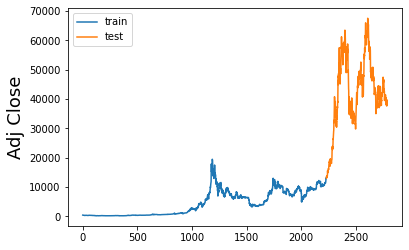

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_train_btc.index,df_train_btc['Adj Close'])
plt.plot(df_test_btc.index,df_test_btc['Adj Close'])
plt.ylabel('Adj Close',fontsize=18)
plt.legend(['train','test'])
plt.show()

In [ ]:
# convert pandas DataFrame into H2O Frame
train_h2o = h2o.H2OFrame(df_train_btc)

test_h2o = h2o.H2OFrame(df_test_btc)
test_h2o_b1 = h2o.H2OFrame(df_tes_btc_b1)

test_h2o_b2 = h2o.H2OFrame(df_tes_btc_b2)
# Describe  the train h20Frame
train_h2o.describe()
test_h2o.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:2230
Cols:7

,Date,Open,High,Low,Close,Adj Close,Volume
type,time,real,real,real,real,real,int
mins,1410912000000.0,176.897003,211.731003,171.509995,178.102997,178.102997,5914570.0
mean,1507204800000.0,4508.038350513447,4620.180629692825,4389.494637562329,4513.618178372201,4513.618178372201,8419803855.064571
maxs,1603497600000.0,19475.80078,20089.0,18974.09961,19497.40039,19497.40039,74156772075.0
sigma,55632084900.71174,4190.259954812177,4308.082802457598,4056.185909069758,4193.371063910227,4193.371063910227,12255234275.042423
zeros,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0
0,2014-09-17 00:00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18 00:00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19 00:00:00,424.102997,427.834991,384.532013,394.79599,394.79599,37919700.0


Rows:557
Cols:7

,Date,Open,High,Low,Close,Adj Close,Volume
type,time,real,real,real,real,real,int
mins,1603670400000.0,13031.20117,13225.29785,12822.38281,13075.24805,13075.24805,13736557863.0
mean,1627689600000.0,42563.6307987971,43706.0944467325,41291.05234217231,42603.32081118494,42603.32081118494,41559768983.174126
maxs,1651708800000.0,67549.73438,68789.625,66382.0625,67566.82813,67566.82813,350968000000.0
sigma,13904898290.890156,12332.45604425169,12541.473142325685,12039.188213063624,12262.817251121536,12262.817251121536,22340736802.376476
zeros,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0
0,2020-10-26 00:00:00,13031.20117,13225.29785,12822.38281,13075.24805,13075.24805,29461458313.0
1,2020-10-27 00:00:00,13075.24219,13759.66895,13060.83789,13654.21875,13654.21875,33749878156.0
2,2020-10-28 00:00:00,13654.21484,13837.69531,12932.25098,13271.28516,13271.28516,35867318895.0


In [ ]:
#model = H2OGradientBoostingEstimator(distribution = "poisson", seed = 1234)
#model.train(x = test_h2o.columns,
               #y = "Adj Close",
               #training_frame = train_h2o,
               #validation_frame = test_h2o)
               # import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl  function
model = H2OAutoML(max_runtime_secs = 600,
                # exclude_algos =['DeepLearning'],
                seed = 52,
                #stopping_metric ='logloss',
                #sort_metric ='logloss',

)
x = test_h2o.columns
y = 'Adj Close'
z = 'Close'
x.remove(y)
x.remove(z)
# train model and record time % time
model.train(x = x, y = y, training_frame = train_h2o, leaderboard_frame=test_h2o_b1)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_5_20230329_45633_model_1


Status of Neuron Layers: predicting Adj Close, regression, gaussian distribution, Quadratic loss, 701 weights/biases, 12.6 KB, 735,900 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms             momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  -------------------  ----------  ---------------------  -------------------  ---------------------  -----------------------
    1        5        Input             20.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.0737577752013458    0.08470490574836731  0.0         -0.01719078395088218   0.24949991703033447  -0.037467705114404316  0.5036795139312744
    3        1        Linear                       0.0   0.0   0.011393049091566354  0.00717739574611187  0.0         -0.030815428344067187  0.211439311504364    -0.29433982186511143   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 3241364.223100241
RMSE: 1800.3789109796417
MAE: 1365.4480780313927
RMSLE: 0.5115745258371974
Mean Residual Deviance: 3241364.223100241

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 5849374.325685969
RMSE: 2418.547978785198
MAE: 1551.1533661038618
RMSLE: NaN
Mean Residual Deviance: 5849374.325685969

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     1679.97      717.167     2357.41       1810.74       1974.66       1794.21       462.843
mean_residual_deviance  6.11571e+06  3.6364e+06  1.03164e+07   6.06386e+06   7.63359e+06   6.18796e+06   376717
mse                     6.11571e+06  3.6364e+06  1.03164e+07   6.06386e+06   7.63359e+06   6.18796e+06   376717
r2                      0.652198     0.208438    0.406736      0.662057      0.568493      0.645338      0.978363
residual_deviance       6.11571e+06  3.6364e+06  1.03164e+07   6.06386e+06   7.63359e+06   6.18796e+06   376717
rmse                    2307.73      993.794     3211.92       2462.49       2762.9        2487.56       613.773
rmsle                   0.653269     0.123638    0.723931      0.725369      nan           0.510507      nan

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-03-29 05:05:27  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2023-03-29 05:05:28  1 min  6.522 sec  59466 obs/sec     10        1             22300      1271.16          1.61585e+06          931.954         0.908067
    2023-03-29 05:05:33  1 min 11.627 sec  69279 obs/sec     170       17            379100     1025.42          1.05148e+06          784.309         0.940177
    2023-03-29 05:05:38  1 min 17.043 sec  67681 obs/sec     330       33            735900     1800.38          3.24136e+06          1365.45         0.815585

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
High        1                      1                    0.280507
Open        0.899732               0.899732             0.252381
Low         0.865627               0.865627             0.242814
Date        0.472556               

In [ ]:
# View the H2O aml leaderboard
lb = model.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_5_20230329_45633_model_1,1812.85,3.28644e+06,1579.72,0.0532848,3.28644e+06
DeepLearning_grid_1_AutoML_5_20230329_45633_model_2,6134.33,3.763e+07,5010.53,0.136547,3.763e+07
DeepLearning_1_AutoML_5_20230329_45633,15053.5,2.26608e+08,12431.4,0.388639,2.26608e+08
DeepLearning_grid_2_AutoML_5_20230329_45633_model_1,17711.9,3.1371e+08,14914.2,0.484475,3.1371e+08
StackedEnsemble_AllModels_3_AutoML_5_20230329_45633,18676.8,3.48822e+08,15546.6,0.518616,3.48822e+08
StackedEnsemble_AllModels_4_AutoML_5_20230329_45633,18723.4,3.50566e+08,15587.5,0.520451,3.50566e+08
StackedEnsemble_BestOfFamily_3_AutoML_5_20230329_45633,19443.5,3.78049e+08,16066.1,0.547745,3.78049e+08
StackedEnsemble_AllModels_2_AutoML_5_20230329_45633,19484.3,3.79638e+08,16100,0.549394,3.79638e+08
DeepLearning_grid_3_AutoML_5_20230329_45633_model_1,19582.3,3.83467e+08,16540.2,0.557257,3.83467e+08
DeepLearning_grid_1_AutoML_5_20230329_45633_model_3,21507.4,4.6257e+08,19543.2,0.697339,4.6257e+08


In [ ]:
# Get the top model of leaderboard
leader = model.leader
leader
# Get the metalearner model of top model
#metalearner = h2o.get_model(se.metalearner()['name'])

# list baselearner models :
#metalearner.varimp()

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_5_20230329_45633_model_1


Status of Neuron Layers: predicting Adj Close, regression, gaussian distribution, Quadratic loss, 701 weights/biases, 12.6 KB, 735,900 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms             momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  -------------------  ----------  ---------------------  -------------------  ---------------------  -----------------------
    1        5        Input             20.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.0737577752013458    0.08470490574836731  0.0         -0.01719078395088218   0.24949991703033447  -0.037467705114404316  0.5036795139312744
    3        1        Linear                       0.0   0.0   0.011393049091566354  0.00717739574611187  0.0         -0.030815428344067187  0.211439311504364    -0.29433982186511143   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 3241364.223100241
RMSE: 1800.3789109796417
MAE: 1365.4480780313927
RMSLE: 0.5115745258371974
Mean Residual Deviance: 3241364.223100241

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 5849374.325685969
RMSE: 2418.547978785198
MAE: 1551.1533661038618
RMSLE: NaN
Mean Residual Deviance: 5849374.325685969

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     1679.97      717.167     2357.41       1810.74       1974.66       1794.21       462.843
mean_residual_deviance  6.11571e+06  3.6364e+06  1.03164e+07   6.06386e+06   7.63359e+06   6.18796e+06   376717
mse                     6.11571e+06  3.6364e+06  1.03164e+07   6.06386e+06   7.63359e+06   6.18796e+06   376717
r2                      0.652198     0.208438    0.406736      0.662057      0.568493      0.645338      0.978363
residual_deviance       6.11571e+06  3.6364e+06  1.03164e+07   6.06386e+06   7.63359e+06   6.18796e+06   376717
rmse                    2307.73      993.794     3211.92       2462.49       2762.9        2487.56       613.773
rmsle                   0.653269     0.123638    0.723931      0.725369      nan           0.510507      nan

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-03-29 05:05:27  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2023-03-29 05:05:28  1 min  6.522 sec  59466 obs/sec     10        1             22300      1271.16          1.61585e+06          931.954         0.908067
    2023-03-29 05:05:33  1 min 11.627 sec  69279 obs/sec     170       17            379100     1025.42          1.05148e+06          784.309         0.940177
    2023-03-29 05:05:38  1 min 17.043 sec  67681 obs/sec     330       33            735900     1800.38          3.24136e+06          1365.45         0.815585

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
High        1                      1                    0.280507
Open        0.899732               0.899732             0.252381
Low         0.865627               0.865627             0.242814
Date        0.472556               

In [ ]:
#model = h2o.get_model('StackedEnsemble_BestOfFamily_4_AutoML_2_20230328_190256')
leader.model_performance(test_h2o_b1)
#perf = model.model_performance(test_h2o)
#perf

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 3286441.6481776815
RMSE: 1812.854557921755
MAE: 1579.7228456601856
RMSLE: 0.053284769572385565
Mean Residual Deviance: 3286441.6481776815

In [ ]:
predictions = model.leader.predict(test_h2o_b2)
predictions

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
39116.1
37769.9
36976.9
37058.2
37753.8
40125.1
42232.8
42624.8
43077.9
43818.1


In [ ]:
test_h2o

,Date,Open,High,Low,Close,Adj Close,Volume
0,1603584000000,13108.06348,13329.18359,12910.06152,13031.17383,13031.17383,24406920575
1,1603670400000,13031.20117,13225.29785,12822.38281,13075.24805,13075.24805,29461458313
2,1603756800000,13075.24219,13759.66895,13060.83789,13654.21875,13654.21875,33749878156
3,1603843200000,13654.21484,13837.69531,12932.25098,13271.28516,13271.28516,35867318895
4,1603929600000,13271.29883,13612.04785,12980.05957,13437.88281,13437.88281,56499499598
...,...,...,...,...,...,...,...
553,1651363200000,37713.26563,38627.85938,37585.78906,38469.09375,38469.09375,27002760110
554,1651449600000,38472.18750,39074.97266,38156.56250,38529.32813,38529.32813,32922642426
555,1651536000000,38528.10938,38629.99609,37585.62109,37750.45313,37750.45313,27326943244
556,1651622400000,37748.01172,39902.94922,37732.05859,39698.37109,39698.37109,36754404490


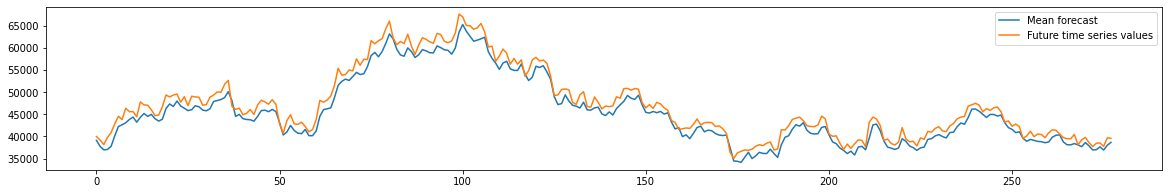

In [ ]:
import matplotlib.pyplot as plt
predictions = predictions.as_data_frame()
train_h2o = train_h2o.as_data_frame()
test_h2o_b2 = test_h2o_b2.as_data_frame()

y_pred = predictions["predict"]

plt.figure(figsize=(20, 3))

y_past = train_h2o["Adj Close"]

y_test = test_h2o_b2["Adj Close"]

#plt.plot(y_past[-500:], label="Past time series values")

plt.plot(y_pred, label="Mean forecast")
plt.plot(y_test, label="Future time series values")


plt.legend();

In [ ]:
import pandas as pd
from google.colab import files
import io
import os

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['COVID-19.csv']))
df.describe()

Saving COVID-19.csv to COVID-19.csv


,Confirmed,Deaths,Recovered,Temparature (°C),Humidity (%)
count,240.000000,240.000000,217.000000,240.000000,240.000000
mean,146844.887500,3096.416667,138031.225806,33.145833,53.300000
std,144165.480808,2411.543748,125689.141757,3.616499,17.837763
min,29.000000,0.000000,35.000000,23.000000,13.000000
25%,12154.000000,204.500000,11357.000000,31.000000,42.000000
50%,124421.500000,3645.500000,122131.000000,33.000000,52.000000
75%,239845.750000,4916.500000,224375.000000,36.000000,68.000000
max,821031.000000,7812.000000,445782.000000,44.000000,94.000000


In [ ]:
from sklearn.model_selection import train_test_split #splitting the dataset
# split into train and test sets
train_count = int(len(df)*(90/100))
df_train_cov = df[0:train_count]
df_test_cov = df[train_count:]
#df_train_btc,df_test_btc=train_test_split(df,test_size=0.2,random_state=1)
df_train_cov.shape,df_test_cov.shape

((216, 6), (24, 6))

In [ ]:
# convert pandas DataFrame into H2O Frame
train_h2o = h2o.H2OFrame(df_train_cov)

test_h2o = h2o.H2OFrame(df_test_cov)

# Describe  the train h20Frame
train_h2o.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:216
Cols:6

,Date,Confirmed,Deaths,Recovered,Temparature (°C),Humidity (%)
type,string,int,int,int,int,int
mins,NaN,29.0,0.0,35.0,27.0,13.0
mean,NaN,116145.63425925931,2673.8240740740757,108023.27461139894,33.740740740740776,54.14351851851849
maxs,NaN,821031.0,6225.0,319828.0,44.0,94.0
sigma,NaN,115835.75245168047,2155.5021702878003,96965.80506062126,3.215862921903238,18.172116504692582
zeros,0,0,1,0,0,0
missing,0,0,0,23,0,0
0,24/3/2020,29.0,0.0,nan,33.0,66.0
1,25/3/2020,30.0,1.0,nan,33.0,73.0
2,26/3/2020,36.0,1.0,nan,29.0,60.0


In [ ]:
# import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl  function
aml = H2OAutoML(max_runtime_secs = 600,
                # exclude_algos =['DeepLearning'],
                seed = 1,
                # stopping_metric ='logloss',
                # sort_metric ='logloss',
                balance_classes = False,
                project_name ='COV'
)
x = test_h2o.columns
y = 'Deaths'
# train model and record time % time
aml.train(x = x, y = y, training_frame = train_h2o)

AutoML progress: |
19:40:38.989: _train param, Dropping bad and constant columns: [Date]


19:40:40.0: _train param, Dropping bad and constant columns: [Date]


19:40:40.226: _train param, Dropping bad and constant columns: [Date]
19:40:40.300: GBM_1_AutoML_3_20230328_194038 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_3_20230328_194038.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 172.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_3_20230328_194038,53.7165,2885.47,25.4259,0.443901,2885.47
XGBoost_grid_1_AutoML_3_20230328_194038_model_239,55.3911,3068.18,25.9299,0.132486,3068.18
GBM_grid_1_AutoML_3_20230328_194038_model_160,55.6093,3092.39,24.941,nan,3092.39
GBM_grid_1_AutoML_3_20230328_194038_model_58,57.0851,3258.71,21.309,0.225331,3258.71
GBM_grid_1_AutoML_3_20230328_194038_model_119,59.4195,3530.67,26.7678,0.197797,3530.67
GBM_grid_1_AutoML_3_20230328_194038_model_144,59.441,3533.23,29.2301,nan,3533.23
GBM_grid_1_AutoML_3_20230328_194038_model_170,59.6248,3555.12,29.5143,nan,3555.12
XGBoost_grid_1_AutoML_3_20230328_194038_model_13,60.3419,3641.15,34.6729,nan,3641.15
GBM_grid_1_AutoML_3_20230328_194038_model_120,62.128,3859.89,25.9303,0.252548,3859.89
XGBoost_grid_1_AutoML_3_20230328_194038_model_228,62.8766,3953.47,27.8573,0.133762,3953.47


In [ ]:
# Get the top model of leaderboard
aml.leader


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
#model = h2o.get_model('')
aml.leader.model_performance(test_h2o)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 720083.0545326812
RMSE: 848.5770763653006
MAE: 704.4790602421855
RMSLE: 0.12537973078402795
Mean Residual Deviance: 720083.0545326812
R^2: -2.297113461857752
Null degrees of freedom: 23
Residual degrees of freedom: 20
Null deviance: 433844350.85390925
Residual deviance: 17281993.30878435
AIC: 401.79997370239573

In [ ]:
predictions = aml.leader.predict(test_h2o)
predictions

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
6208.03
6207.21
6196.52
6202.21
6194.4
6196.33
6208.51
6207.42
6201.78
6198.02


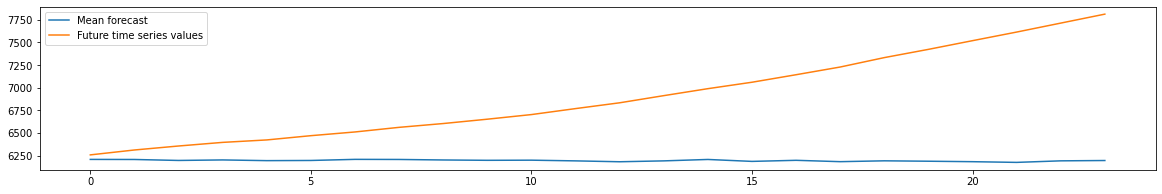

In [ ]:
import matplotlib.pyplot as plt
predictions = predictions.as_data_frame()
train_h2o = train_h2o.as_data_frame()
test_h2o = test_h2o.as_data_frame()

y_pred = predictions["predict"]

plt.figure(figsize=(20, 3))

y_past = train_h2o["Deaths"]

y_test = test_h2o["Deaths"]

#plt.plot(y_past[-500:], label="Past time series values")

plt.plot(y_pred, label="Mean forecast")
plt.plot(y_test, label="Future time series values")


plt.legend();